## Import Data


In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
import pandas as pd
data = pd.read_csv('airquality (1).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [21]:
# data = data.drop(columns = ['Timestamp','deviceId','payload_id'])
# data

In [22]:
data.isnull().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [23]:
data.isna().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [26]:
data.describe(

)

,PM2.5,co2,no2,so2,o3
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,20.614936,2330.332889,100.995833,132.494916,124.645774
std,11.985017,2092.686367,89.962540,120.542128,59.050665
min,3.000000,40.000000,5.000000,1.000000,10.000000
25%,11.000000,624.500000,27.000000,35.000000,77.000000
50%,18.000000,1183.000000,48.000000,59.000000,123.000000
75%,28.000000,4092.500000,174.000000,229.000000,167.000000
max,48.000000,6999.000000,300.000000,400.000000,250.000000


In [27]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 0


In [28]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

No more outliers detected.
Number of rows after removing outliers iteratively: 5999


,PM2.5,co2,no2,so2,o3
0,25,40,40,40,180
1,26,6286,145,201,157
2,36,1970,152,336,76
3,47,6837,150,382,210
4,40,3979,39,373,84


In [29]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [30]:
# from sklearn.preprocessing import StandardScaler

# # Dataframe kamu: data_cleaned
# features = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO2 (ppm)", "Temperature (Celsius)", "Temperature (Fahrenheit)", "Humidity (%)"]


<Axes: >

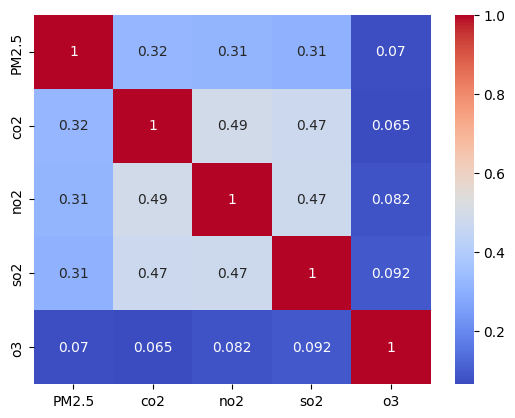

In [31]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [32]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

In [34]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Range jumlah cluster yang diuji
cluster_range = range(2, 11)  # bisa diatur sesuai kebutuhan

silhouette_scores = {}

# Loop dengan tqdm
for n_clusters in tqdm(cluster_range, desc="Evaluating clusters", unit="cluster"):
    ahc = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = ahc.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, labels)
    print(f"n_cluster = {n_clusters} Silhouette Score = {score}")
    silhouette_scores[n_clusters] = score

# Cari jumlah cluster optimal
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)

print("\n--- Analisis Silhouette Score ---")
for n, score in silhouette_scores.items():
    print(f"Jumlah cluster {n}: Silhouette Score = {score:.4f}")

print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")


Evaluating clusters:  11%|█         | 1/9 [00:00<00:04,  1.95cluster/s]

n_cluster = 2 Silhouette Score = 0.333783514317128


Evaluating clusters:  22%|██▏       | 2/9 [00:00<00:03,  2.08cluster/s]

n_cluster = 3 Silhouette Score = 0.33174085593794206


Evaluating clusters:  33%|███▎      | 3/9 [00:01<00:02,  2.10cluster/s]

n_cluster = 4 Silhouette Score = 0.3246782895170424


Evaluating clusters:  44%|████▍     | 4/9 [00:01<00:02,  2.09cluster/s]

n_cluster = 5 Silhouette Score = 0.31866851674298674


Evaluating clusters:  56%|█████▌    | 5/9 [00:02<00:01,  2.12cluster/s]

n_cluster = 6 Silhouette Score = 0.1836964918900551


Evaluating clusters:  67%|██████▋   | 6/9 [00:02<00:01,  2.13cluster/s]

n_cluster = 7 Silhouette Score = 0.18374045642302417


Evaluating clusters:  78%|███████▊  | 7/9 [00:03<00:00,  2.18cluster/s]

n_cluster = 8 Silhouette Score = 0.18349154597431414


Evaluating clusters:  89%|████████▉ | 8/9 [00:03<00:00,  2.19cluster/s]

n_cluster = 9 Silhouette Score = 0.18478874453664623


Evaluating clusters: 100%|██████████| 9/9 [00:04<00:00,  2.16cluster/s]

n_cluster = 10 Silhouette Score = 0.1833994228307033

--- Analisis Silhouette Score ---
Jumlah cluster 2: Silhouette Score = 0.3338
Jumlah cluster 3: Silhouette Score = 0.3317
Jumlah cluster 4: Silhouette Score = 0.3247
Jumlah cluster 5: Silhouette Score = 0.3187
Jumlah cluster 6: Silhouette Score = 0.1837
Jumlah cluster 7: Silhouette Score = 0.1837
Jumlah cluster 8: Silhouette Score = 0.1835
Jumlah cluster 9: Silhouette Score = 0.1848
Jumlah cluster 10: Silhouette Score = 0.1834

Jumlah cluster optimal berdasarkan Silhouette Score: 2


Silhouette Score: 0.3338
Davies-Bouldin Index: 1.1616


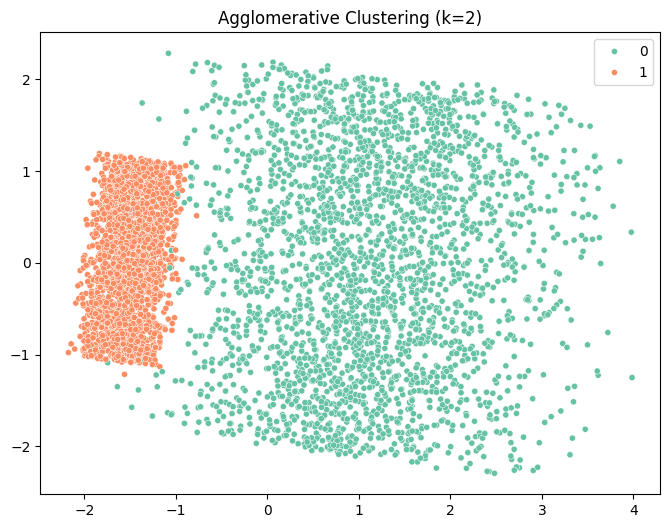

                 PM2.5          co2         no2         so2          o3
Cluster_AHC                                                            
0            25.250361  3574.844156  154.776335  201.778139  130.449134
1            14.333004   601.835224   27.518994   36.090775  116.448446


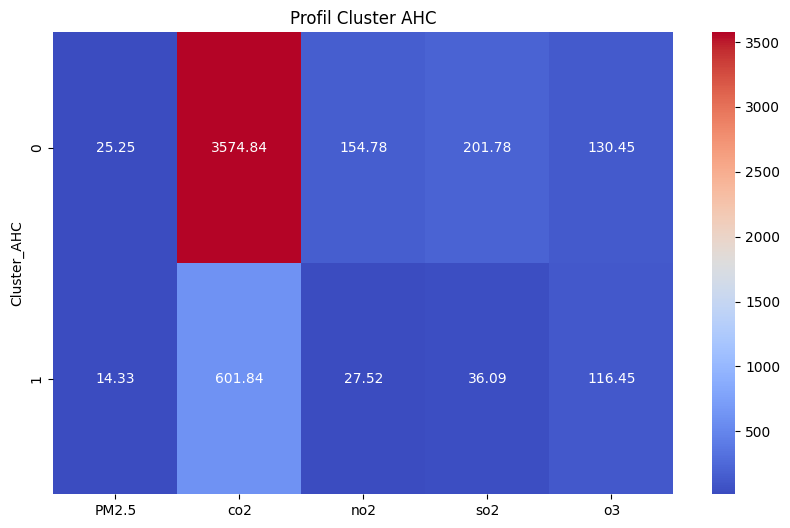

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit dengan jumlah cluster optimal
ahc_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
ahc_labels = ahc_optimal.fit_predict(X_train_scaled)

# Evaluasi
sil_score = silhouette_score(X_train_scaled, ahc_labels)
dbi_score = davies_bouldin_score(X_train_scaled, ahc_labels)
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

# %%
# Visualisasi PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=ahc_labels, palette="Set2", s=20)
plt.title(f"Agglomerative Clustering (k={optimal_clusters})")
plt.show()

# %%
# Profil cluster
X_train["Cluster_AHC"] = ahc_labels
cluster_profile = X_train.groupby("Cluster_AHC").mean()
print(cluster_profile)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster AHC")
plt.show()

In [37]:
print(X_train.columns.tolist())


['PM2.5', 'co2', 'no2', 'so2', 'o3', 'Cluster_AHC']


In [38]:
X_train = X_train.rename(columns={
    "co2": "CO",
    "no2": "NO2",
    "so2": "SO2",
    "o3": "O3"
})


In [40]:
import numpy as np
import pandas as pd

# --- Breakpoints AQI ---
# format: pollutant: [(Bmin, Bmax, Imin, Imax)]
aqi_breakpoints = {
    "PM2.5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), 
              (91, 120, 201, 300), (121, 250, 301, 400)],
    "NO2":   [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), 
              (181, 280, 201, 300), (281, 400, 301, 400)],
    "O3":    [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), 
              (169, 208, 201, 300), (209, 748, 301, 400)],
    "SO2":   [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), 
              (381, 800, 201, 300), (801, 1600, 301, 400)],
    "CO":    [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), 
              (10.1, 17, 201, 300), (17.1, 34, 301, 400)],
}

# --- Fungsi hitung sub-index ---
def calculate_subindex(pollutant, value):
    if pollutant not in aqi_breakpoints:
        return np.nan
    for Bmin, Bmax, Imin, Imax in aqi_breakpoints[pollutant]:
        if Bmin <= value <= Bmax:
            return ((Imax - Imin) / (Bmax - Bmin)) * (value - Bmin) + Imin
    return np.nan  # jika diluar range

# --- Fungsi hitung AQI per baris ---
def calculate_aqi(row):
    sub_indices = {}
    for pollutant in ["PM2.5", "NO2", "O3", "SO2", "CO"]:
        sub_indices[pollutant] = calculate_subindex(pollutant, row[pollutant])
    # Ambil sub-index tertinggi
    max_pollutant = max(sub_indices, key=sub_indices.get)
    max_value = sub_indices[max_pollutant]
    return max_value, max_pollutant

# --- Mapping kategori AQI ---
def categorize_aqi(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Satisfactory"
    elif value <= 200: return "Moderate"
    elif value <= 300: return "Poor"
    elif value <= 400: return "Very Poor"
    else: return "Severe"

# --- Tambahkan ke DataFrame ---
# --- Tambahkan ke DataFrame ---
X_train["AQI_Value"], X_train["Dominant_Pollutant"] = zip(*X_train.apply(calculate_aqi, axis=1))
X_train["AQI_Category"] = X_train["AQI_Value"].apply(categorize_aqi)


AQI_Category  Good  Moderate  Poor  Satisfactory  Very Poor
Cluster_AHC                                                
0                2       964  1133            43        630
1                8      1088   188           743          0


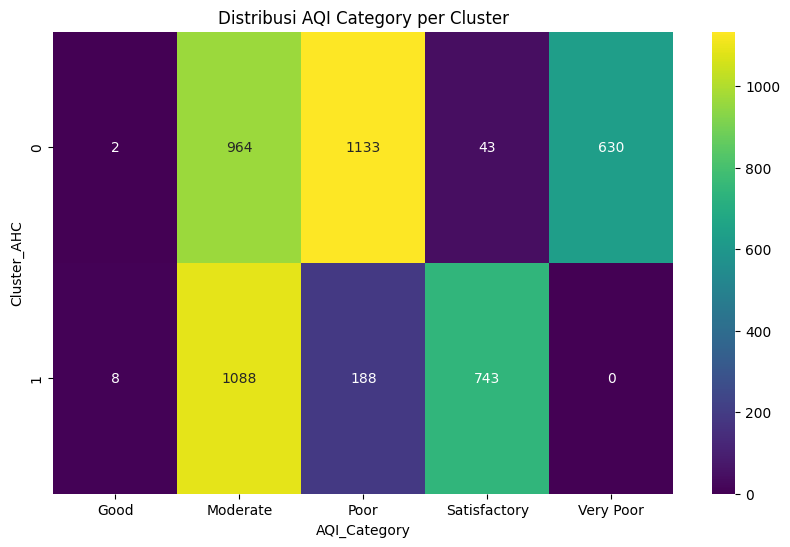

In [41]:
# Crosstab cluster vs AQI
crosstab = pd.crosstab(X_train["Cluster_AHC"], X_train["AQI_Category"])
print(crosstab)

plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, cmap="viridis", fmt="d")
plt.title("Distribusi AQI Category per Cluster")
plt.show()

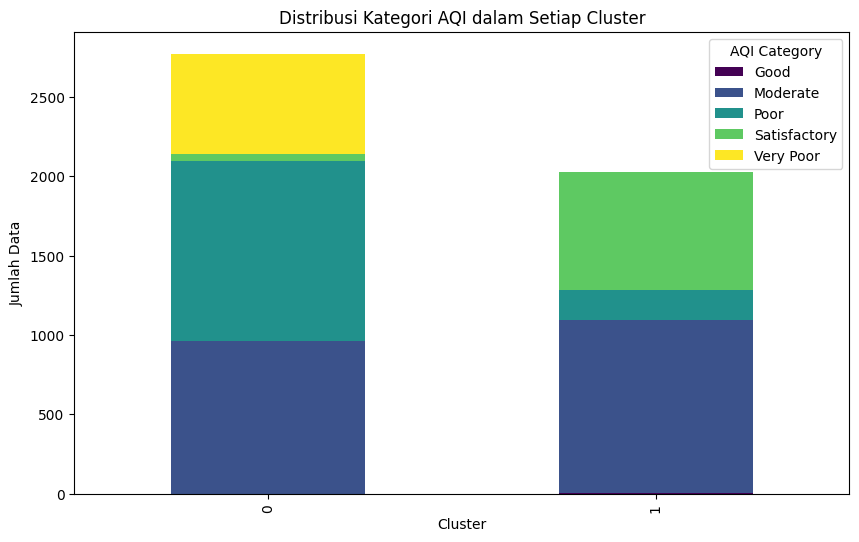

In [42]:
# Plot distribusi
crosstab.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Distribusi Kategori AQI dalam Setiap Cluster")
plt.xlabel("Cluster"); plt.ylabel("Jumlah Data")
plt.legend(title="AQI Category")
plt.show()